max norm: 2.11755457894
-4.77048955894e-18
0.0025


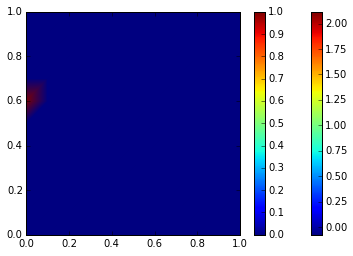

In [7]:
%matplotlib inline
%run /home/fenics/fenics-matplotlib.py
from dolfin import *
import logging; logging.getLogger('FFC').setLevel(logging.WARNING)

# Declare mesh and FEM functions
mesh = UnitSquareMesh(10, 10)
V = FunctionSpace(mesh, "CG", 1)
f = Expression("1. + sin(10*x[0])*cos(7*x[1])", degree=3)
v = TestFunction(V)
u = Function(V) # FEM solution

# Weak form of L2 projection
r = (u - f)*v*dx

# Solving the linear system generated by the L2 projection
solve(r == 0, u)

# Plot the FEM solution
mplot_function(u)
plt.colorbar()

print "max norm:", u.vector().norm('linf') 

phi = Function(V) 
phi.vector()[:] = 0
phi.vector()[10] = 1
mplot_function(phi)
plt.colorbar()

print assemble((u - f)*phi*dx)
print assemble(phi*phi*dx)